# **BASIC IMAGE CLASSIFICATION WITH TENSORFLOW**

Creating and training a model that takes handwritten digits and classifies them.

# **IMPORTING THE REQUIRED MODULES**

In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

**INSTALLING JUPYTER EXTENSIONS FOR AUTOCOMPLETE [OPTIONAL]**

In [ ]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user
!jupyter nbextension enable --py widgetsnbextension && jupyter nbextension enable --py --sys-prefix widgetsnbextension && jupyter nbextension enable --py autocomplete

# **IMPORTING THE DATASET**

In [23]:
object = tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels) = object.load_data()

**Checking the shape of imported dataset**

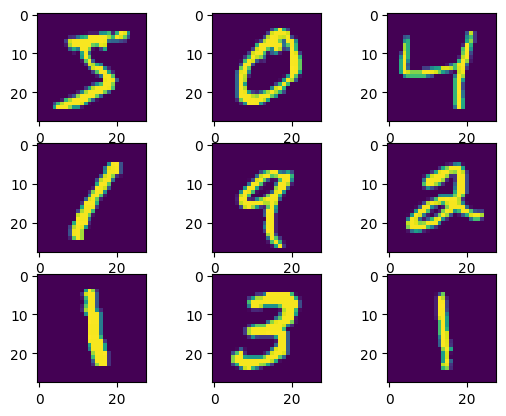

In [12]:
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)
  #plot raw pixel data
  plt.imshow(training_images[i])


**Plotting images for better understanding**

In [15]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

# **HOT ENCODING**

In this, each and every label-> [ ] with 10 elements at the index corresponding to that class will be set to 1 and other will be set to 0. For example: 5 -> [0 0 0 0 0 1 0 0 0 0]

Labels are encoded so that our neural network to know which switch is on for the given class

In [42]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(training_labels)
y_test_encoded = to_categorical(test_labels)

In [43]:
y_train_encoded.shape

(60000, 10)

In [44]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **NEURAL NETWORKS**

**Neural Network Layer Architecture**

Hidden layer is located between input and output layer of the algorithm; In hidden layer function applies weight to the inputs and directs them through activation function as the output "performs non-linear transformations of the inputs entered into the network".  

1.Input is fed to the input layer, the neurons performs a linear transformation using the weights and biases X = (weight * input)+bias  
2.An activation function is applied to the above result Y = Activation(X)  
3.Finally the output from the activation function moves to the next hidden layer and the same process is repeated. This forward movement of info is known as **forward propogation**.

# **PRE PROCESSING THE DATA**

In [30]:
x_train_reshaped = np.reshape(training_images,(60000,784))
x_test_reshaped = np.reshape(test_images,(10000,784))

#displaying the pixels
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [33]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10
x_train_norm = (x_train_reshaped-x_mean)/(x_std + epsilon)

print(x_train_norm)

[[-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 ...
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]]


**Normalizing the Data**

Data is normalized for better and effective computation

In [34]:
x1_mean = np.mean(x_test_reshaped)
x1_std = np.std(x_test_reshaped)
x_test_norm = (x_test_reshaped - x1_mean)/(x1_std + epsilon)

# **CREATING A MODEL**

**importing the sequential class**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential([
    Dense(128, activation='relu',input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# **COMPILING AND TRAINING OUR MODEL**

In [49]:
model.compile(optimizer="sgd",loss ="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**Training our model**

In [50]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3731 - accuracy: 0.8914
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1899 - accuracy: 0.9444
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1436 - accuracy: 0.9584


**Evaluating**

In [60]:
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)
print("Accuracy:",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1359 - accuracy: 0.9596
Accuracy: 0.9595999717712402


# **PREDICTIONS**

In [54]:
preds = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


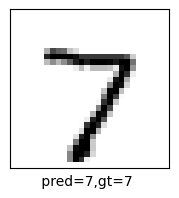

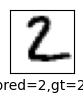

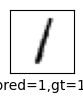

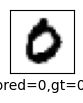

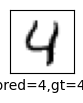

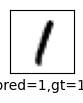

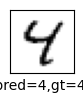

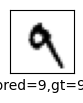

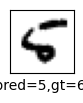

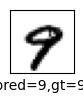

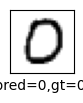

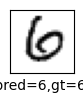

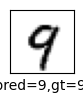

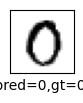

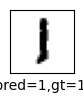

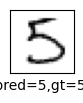

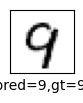

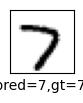

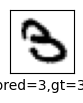

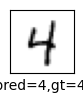

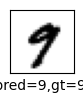

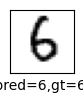

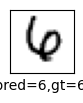

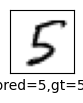

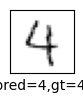

In [58]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid("false")
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index + i])
  gt = test_labels[start_index+i]

  col = 'g'
  if pred != gt:
    col = 'r'

  plt.xlabel(' pred={},gt={}  '.format(gt,pred))
  plt.imshow(test_images[start_index+i],cmap='binary')
  plt.show()

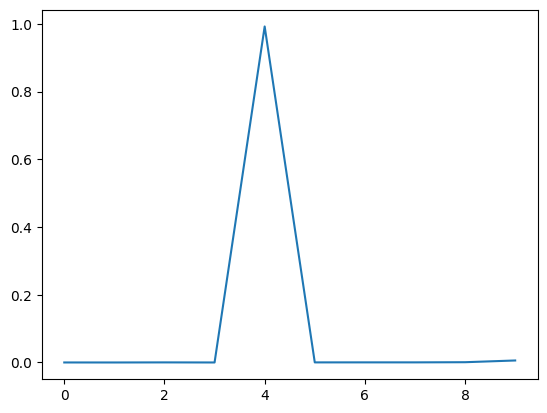

In [67]:
plt.plot(preds[4])